# **Customer Churn Prediction Project**

 - Customer retention is critical for long-term growth, especially in industries
like e-commerce and SaaS, where user acquisition costs are high and competition is constant. This project explores customer churn by modeling behavioral patterns that signal when a customer is starting to disengage.

 - Rather than relying on a hard churn definition like account cancellation, churn is defined as an **engagement score below 30**, a more flexible and proactive way to spot risk early. Using a dataset of customer activity, several Machine Learning models were trained to predict churn, evaluate their performance, and identify the behaviors that most influence customer loyalty.

 - The goal is to help businesses take timely, targeted action to keep valuable customers from slipping away. Improving churn prediction allows the company to reduce revenue loss, lower acquisition costs, and increase customer lifetime value through targeted re-engagement strategies.

---

# **Dataset Preview**

This dataset contains 10,000 rows of synthetic customer data, with the following columns:

| Column                     | Type         | Description                                                              |
|----------------------------|--------------|--------------------------------------------------------------------------|
| `customer_id`              | Categorical  | Unique ID                                                                |
| `age`                      | Numeric      | Age of customer                                                          |
| `gender`                   | Categorical  | M / F / Other                                                            |
| `city`                     | Categorical  | City label                                                               |
| `signup_days_ago`          | Numeric      | Days since customer signed up                                            |
| `total_spend`              | Numeric      | Total lifetime spend                                                     |
| `avg_order_value`          | Numeric      | Average order size                                                       |
| `purchase_frequency`       | Numeric      | Purchases per month                                                      |
| `time_since_last_purchase` | Numeric      | Days since last transaction                                              |
| `most_frequent_category`   | Categorical  | Top product category                                                     |
| `customer_support_calls`   | Numeric      | Number of times they contacted support                                   |
| `discount_usage_rate`      | Numeric      | % of purchases made with a discount                                      |
| `device_type`              | Categorical  | Desktop / Mobile / Tablet                                                |
| `preferred_purchase_time`  | Categorical  | Morning / Afternoon / Evening                                            |
| `email_open_rate`          | Numeric      | % of marketing emails opened                                             |
| `app_opens_last_30d`       | Numeric      | How many times the app was opened in the last 30 days                    |
| `engagement_score`         | Numeric      | Measures recent customer activity (0–100) based on app, email, and purchases |


---

# **Tools Used**

- **SQL (Google BigQuery)** for initial exploratory data analysis (EDA)
- **Python (Google Colab)** for model building, feature engineering, and evaluation
- **Pandas & NumPy** for data manipulation
- **Seaborn & Matplotlib** for data visualization
- **Scikit-learn** for preprocessing, modeling, and performance metrics
- **XGBoost** for advanced modeling and hyperparameter tuning
- **Power BI** for the creation of a summary dashboard

---

# **Getting Started**

This section initializes the project environment by importing necessary libraries, suppressing warnings, and setting up basic notebook configurations. This ensures everything runs smoothly before the data is loaded.

---

# **Importing Modules**

In [ ]:
# core
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV

# models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

---

# **Data Loading**

Upload the dataset into Colab and configure display options to preview the complete structure.

In [ ]:
# selecting data file
from google.colab import files
uploaded = files.upload()

Saving customer_engagement.csv to customer_engagement.csv


In [ ]:
# setting options to show every column when running df.head()
pd.set_option('display.max_columns', None)

# reading in data, displaying first 5 rows
df = pd.read_csv('customer_engagement.csv')
df.head()

,customer_id,age,gender,city,signup_days_ago,total_spend,avg_order_value,purchase_frequency,time_since_last_purchase,most_frequent_category,customer_support_calls,discount_usage_rate,device_type,preferred_purchase_time,email_open_rate,app_opens_last_30d,engagement_score
0,CUST_00000,56,Other,Chicago,1334,1022.57,90.86,1.28,40,Home,2,0.50,Tablet,Morning,0.69,12,45.31
1,CUST_00001,69,Female,San Jose,755,69.08,74.45,1.47,91,Clothing,0,0.04,Desktop,Evening,0.85,7,56.58
2,CUST_00002,46,Female,Phoenix,1075,57.18,65.73,3.90,113,Home,1,0.30,Desktop,Evening,0.66,14,52.96
3,CUST_00003,32,Male,Jacksonville,495,166.14,96.83,3.37,108,Electronics,1,0.41,Mobile,Morning,0.83,8,25.65
4,CUST_00004,60,Female,Fort Worth,409,447.80,51.38,1.12,134,Sports,0,0.67,Mobile,Evening,0.77,5,33.05


---

# **Defining Churn**

Churn is defined as customers with an engagement score below 30. This flexible threshold allows early intervention and the application of retention strategies before complete disengagement occurs.


In [ ]:
# churn will be identified as an engagement score of < 30
df['churn'] = (df['engagement_score'] < 30).astype(int)
df.head()

,customer_id,age,gender,city,signup_days_ago,total_spend,avg_order_value,purchase_frequency,time_since_last_purchase,most_frequent_category,customer_support_calls,discount_usage_rate,device_type,preferred_purchase_time,email_open_rate,app_opens_last_30d,engagement_score,churn
0,CUST_00000,56,Other,Chicago,1334,1022.57,90.86,1.28,40,Home,2,0.50,Tablet,Morning,0.69,12,45.31,0
1,CUST_00001,69,Female,San Jose,755,69.08,74.45,1.47,91,Clothing,0,0.04,Desktop,Evening,0.85,7,56.58,0
2,CUST_00002,46,Female,Phoenix,1075,57.18,65.73,3.90,113,Home,1,0.30,Desktop,Evening,0.66,14,52.96,0
3,CUST_00003,32,Male,Jacksonville,495,166.14,96.83,3.37,108,Electronics,1,0.41,Mobile,Morning,0.83,8,25.65,1
4,CUST_00004,60,Female,Fort Worth,409,447.80,51.38,1.12,134,Sports,0,0.67,Mobile,Evening,0.77,5,33.05,0


---

# **Data Cleaning**

Check for missing values and duplicates, inspect data types and cardinality, review class balance, and remove irrelevant columns.


In [ ]:
# check for null values
df.isnull().sum()

,0
customer_id,0
age,0
gender,0
city,0
signup_days_ago,0
total_spend,0
avg_order_value,0
purchase_frequency,0
time_since_last_purchase,0
most_frequent_category,0


In [ ]:
# checking for duplicate rows
df.duplicated().sum()

np.int64(0)

In [ ]:
# viewing datatypes
df.dtypes

,0
customer_id,object
age,int64
gender,object
city,object
signup_days_ago,int64
total_spend,float64
avg_order_value,float64
purchase_frequency,float64
time_since_last_purchase,int64
most_frequent_category,object


In [ ]:
# checking cardinality
df.nunique().sort_values(ascending=False)

,0
customer_id,10000
total_spend,9506
avg_order_value,6172
engagement_score,4736
signup_days_ago,1817
purchase_frequency,574
time_since_last_purchase,180
email_open_rate,90
discount_usage_rate,87
age,52


- Numeric columns like `total_spend`, `email_open_rate`, and `signup_days_ago` have high cardinality and will be scaled.
- Categorical columns like `gender`, `device_type`, and `preferred_purchase_time` have low cardinality and are good candidates for one-hot encoding.
- High-cardinality categoricals like `city` (15 unique values) may still be one-hot encoded, but could be grouped if needed.

Understanding cardinality helps choose the right encoding strategy and avoid unnecessary dimensionality.

In [ ]:
# checking churn class balance, 0 = Retained, 1 = Churned
df['churn'].value_counts(normalize=True)

,proportion
churn,
0,0.8797
1,0.1203


In [ ]:
# dropping customer_id
df.drop('customer_id', axis=1, inplace=True)

---

# **Exploratory Analysis**

Explore how churn varies by demographic and behavioral features. These visuals help uncover potential drivers of churn.


In [ ]:
# set chart style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

---

## **Engagement Score Distribution**

This shows how engagement scores are distributed across the customer base and helps validate the churn threshold.

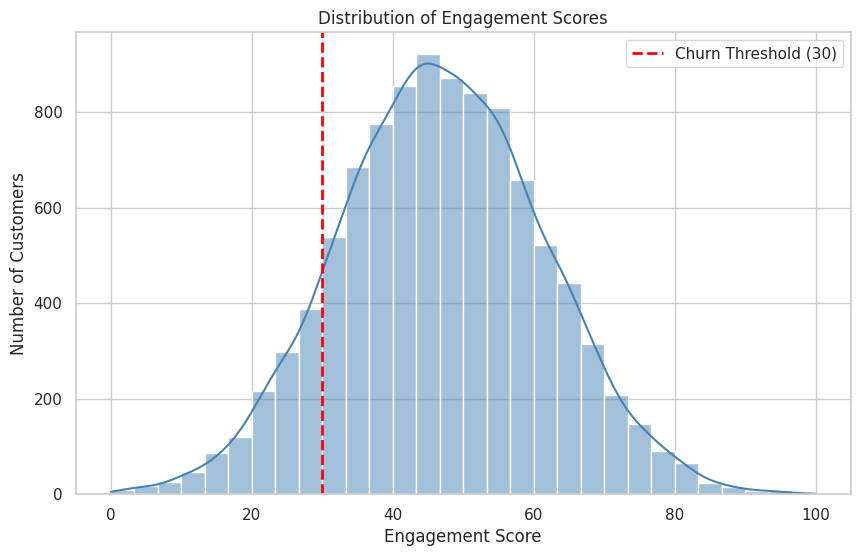

In [ ]:
# histogram of engagement score
plt.figure(figsize=(10, 6))
sns.histplot(df['engagement_score'], bins=30, kde=True, color='steelblue')

# add churn threshold line
plt.axvline(x=30, color='red', linestyle='--', linewidth=2, label='Churn Threshold (30)')

# labels
plt.title('Distribution of Engagement Scores')
plt.xlabel('Engagement Score')
plt.ylabel('Number of Customers')
plt.legend()
plt.grid(True)
plt.show()

This histogram shows the distribution of engagement scores across all customers. The red dashed line marks the churn threshold at a score of 30. Customers below this threshold are considered at risk, highlighting a clear separation between engaged and disengaged users.



---



## Customer Segmentation Table


In [ ]:
# define segments
def segment_customer(row):
    if row['engagement_score'] >= 70:
        return 'High-Spenders'
    elif row['engagement_score'] >= 30:
        return 'Moderate Users'
    else:
        return 'Churned Customers'

df['segment'] = df.apply(segment_customer, axis=1)

# calculate averages by segment
segment_summary = df.groupby('segment').agg({
    'engagement_score': 'mean',
    'purchase_frequency': 'mean',
    'app_opens_last_30d': 'mean',
    'email_open_rate': 'mean'
}).round(1).reset_index()

# reorder for clarity
segment_order = ['High-Spenders', 'Moderate Users', 'Churned Customers']
segment_summary['segment'] = pd.Categorical(segment_summary['segment'], categories=segment_order, ordered=True)
segment_summary = segment_summary.sort_values('segment')

# display
print(segment_summary.to_string(index=False))

          segment  engagement_score  purchase_frequency  app_opens_last_30d  email_open_rate
    High-Spenders              76.2                 2.5                12.1              0.8
   Moderate Users              48.4                 2.0                10.0              0.7
Churned Customers              22.9                 1.6                 8.5              0.6


This table compares engagement metrics across three customer segments. High-spenders show the strongest activity across all features, while churned customers exhibit the lowest levels of app usage, purchase frequency, and email responsiveness. Moderate users fall in between, highlighting them as a key segment for proactive retention efforts.





---



### **Churn Distribution**

Basic class balance check to see how many customers are labeled as churned vs retained.


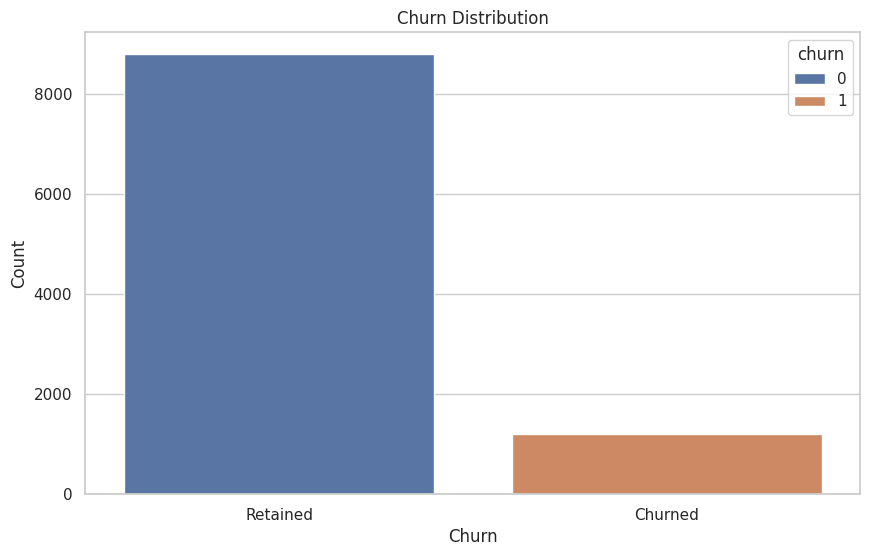

In [ ]:
# churn distribution plot
plt.figure()
sns.countplot(x='churn', hue='churn', data=df)
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks([0, 1], ['Retained', 'Churned'])
plt.show()

This chart shows class imbalance — the majority of customers are retained, while churners make up a smaller portion. This impacts model performance and requires special handling (e.g., class weighting or SMOTE).


---

### **Churn by Gender**

Explore whether there's a noticeable churn pattern by gender.


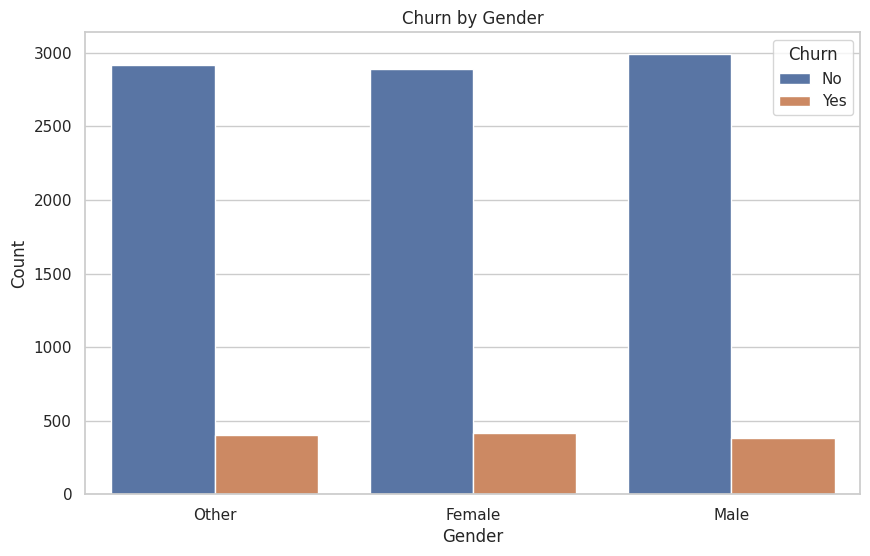

In [ ]:
# churn by gender
plt.figure()
sns.countplot(x='gender', hue='churn', data=df)
plt.title('Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

This breakdown helps identify whether certain customer segments are more likely to churn. In this case, churn is fairly distributed across genders.


---

### **Churn by City**

Visualize churn distribution across the top 10 cities by customer count.


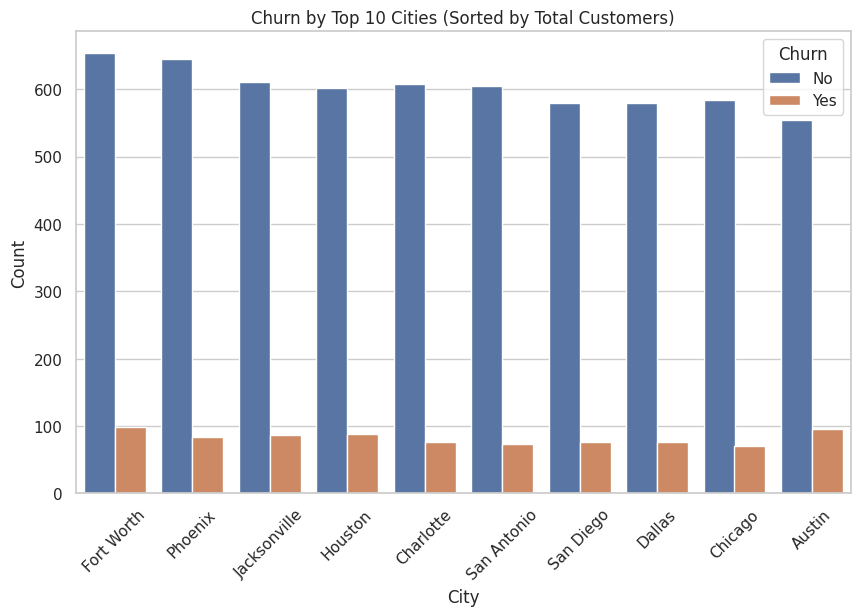

In [ ]:
# Filter for top cities by total customer count
top_cities = df['city'].value_counts().nlargest(10).index
df_top_cities = df[df['city'].isin(top_cities)]

# Sort city order by total count (churned + non-churned)
city_order = (
    df_top_cities.groupby('city')
    .size()
    .sort_values(ascending=False)
    .index
)

# Plot
plt.figure()
sns.countplot(x='city', hue='churn', data=df_top_cities, order=city_order)
plt.title('Churn by Top 10 Cities (Sorted by Total Customers)')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

This breakdown helps identify whether specific customer segments are more likely to churn. In this case, churn varies by city.


---

### **Distributions by Churn**

Look at how numeric features vary between churned and retained customers.


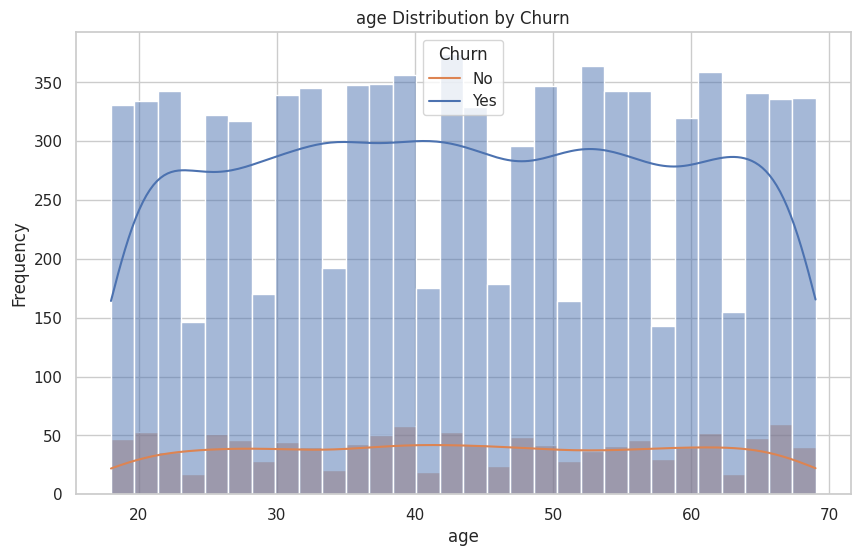

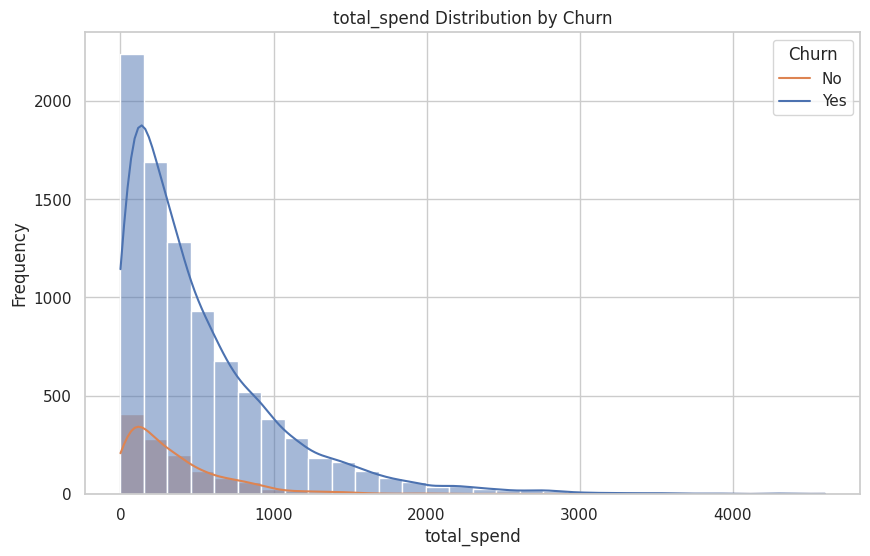

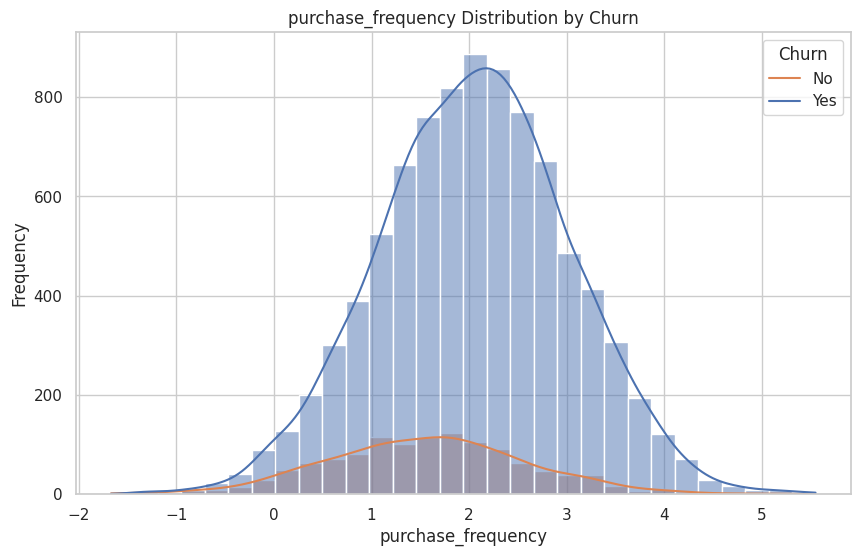

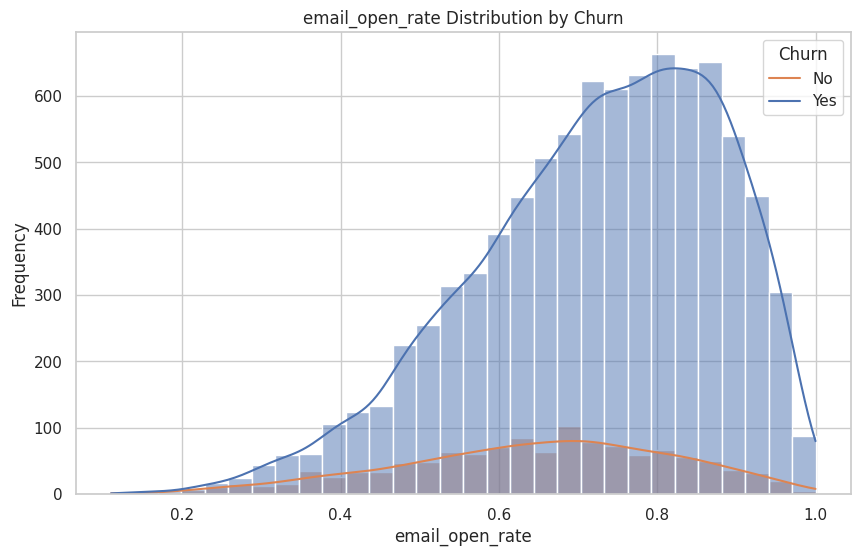

In [ ]:
# distribution of numeric columns by churn
num_cols = ['age', 'total_spend', 'purchase_frequency', 'email_open_rate']
for col in num_cols:
    plt.figure()
    sns.histplot(data=df, x=col, hue='churn', kde=True, bins=30)
    plt.title(f'{col} Distribution by Churn')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend(title='Churn', labels=['No', 'Yes'])
    plt.show()

These plots highlight how behavioral features differ between churned and retained customers. For example, churners often have lower spend and lower app usage.



---

### **Boxplots of Key Metrics by Churn**

Identify median and outlier behavior by churn class for core numeric variables.


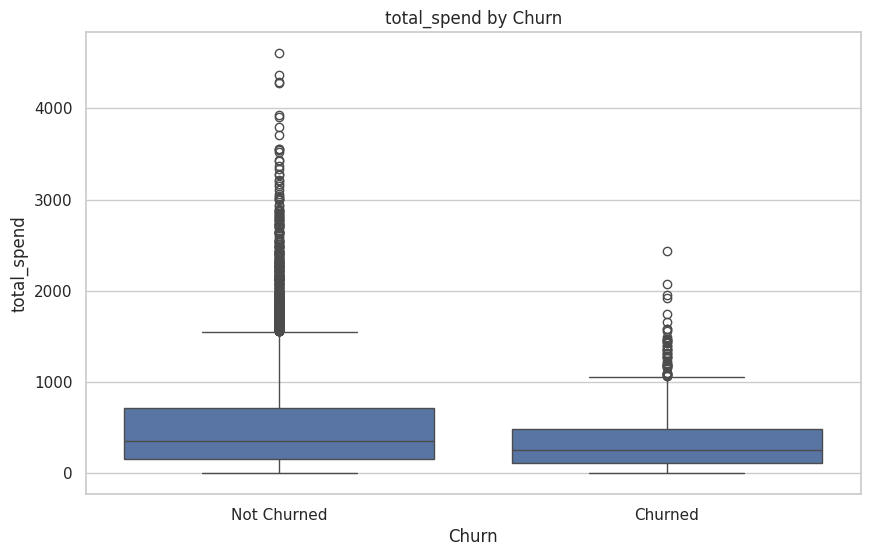

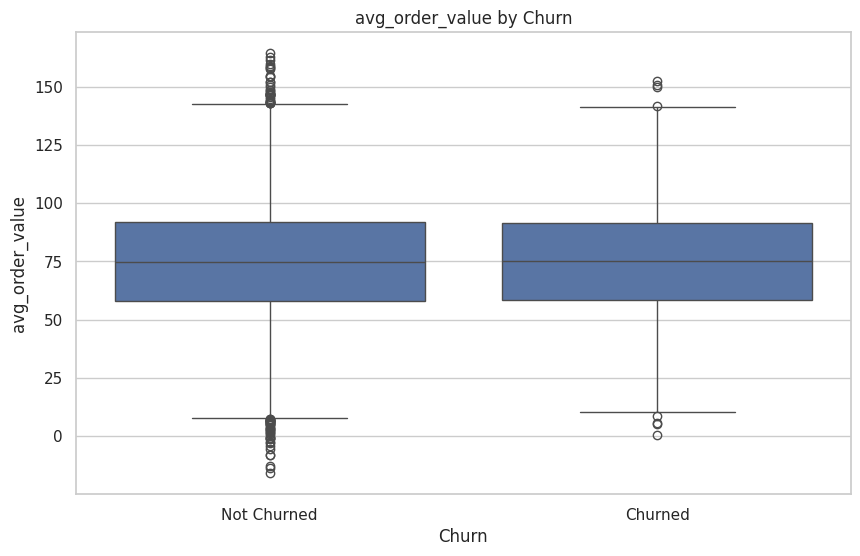

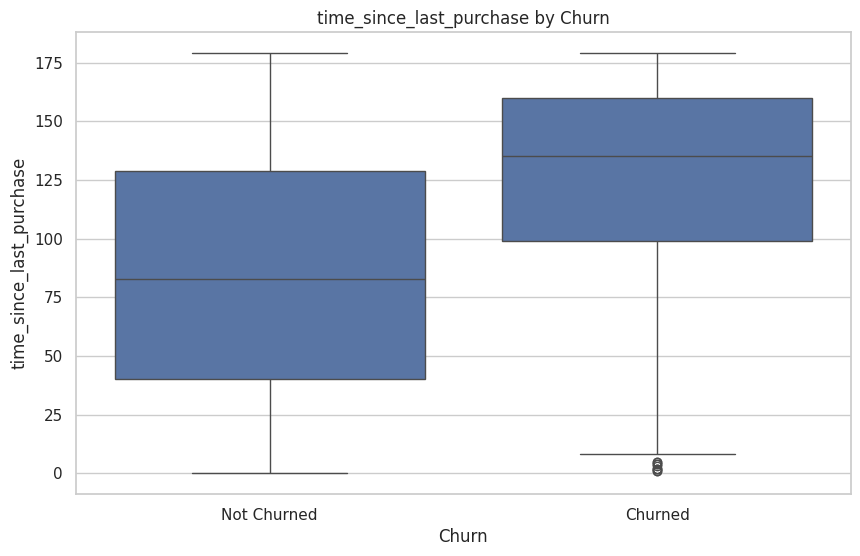

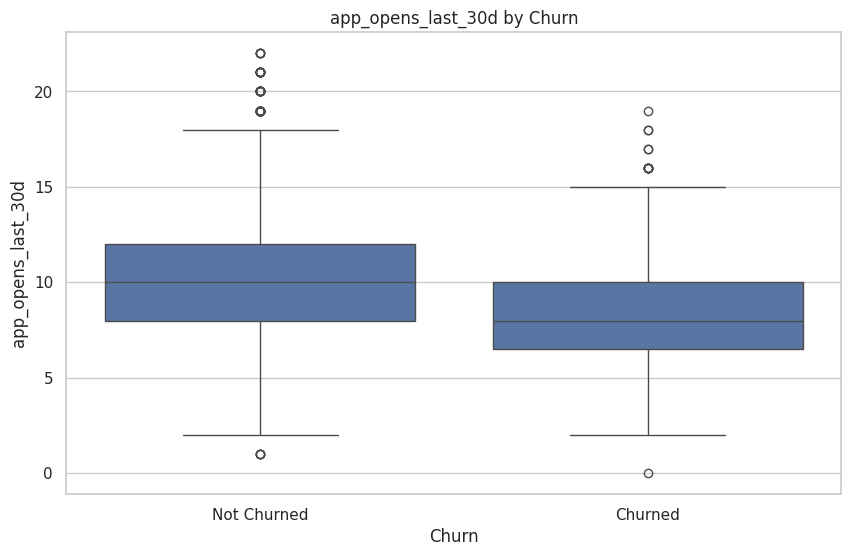

In [ ]:
# boxplots for churn vs. numeric columns
box_cols = ['total_spend', 'avg_order_value', 'time_since_last_purchase', 'app_opens_last_30d']
for col in box_cols:
    plt.figure()
    sns.boxplot(x='churn', y=col, data=df)
    plt.title(f'{col} by Churn')
    plt.xlabel('Churn')
    plt.ylabel(col)
    plt.xticks([0, 1], ['Not Churned', 'Churned'])
    plt.show()

Boxplots help visualize medians and outliers. Customers who churn tend to have fewer app opens and lower average order values.


---

### **Feature Correlation**

Check correlations between numeric features to identify strong predictors of churn or redundancy.


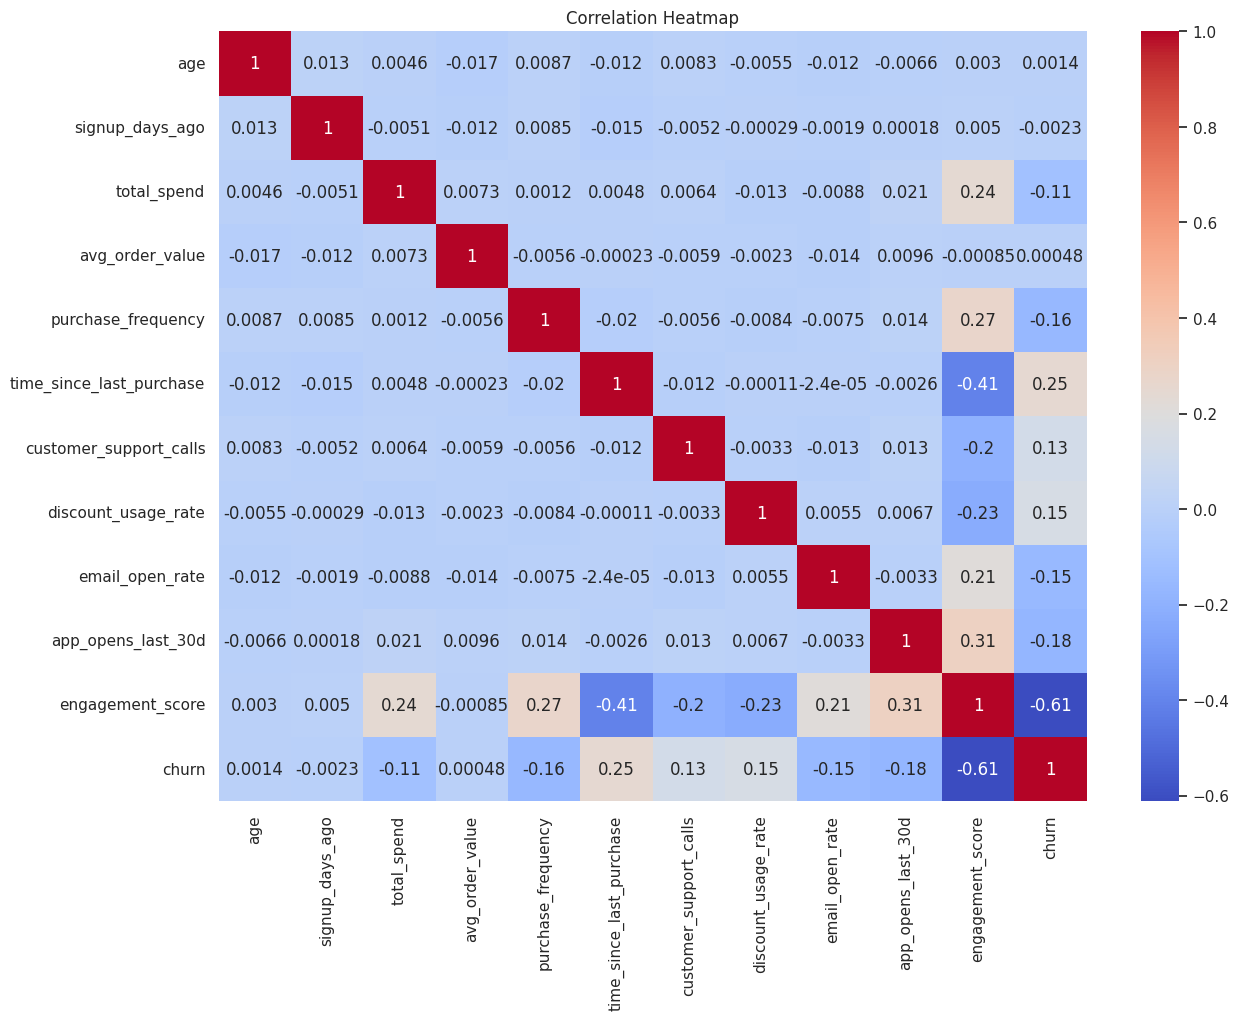

In [ ]:
# correlation heatmap
plt.figure(figsize=(14, 10))
corr = df.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap')
plt.show()

There’s limited correlation among features, which is a good sign — it reduces redundancy and improves model learning.


---

# **Data Preprocessing**

This stage prepares the dataset for modeling by cleaning, transforming, and engineering the features.

Steps included:
- **Categorical encoding**: Applied one-hot encoding to convert categorical variables into numeric format.
- **Feature scaling**: Standardized numerical features to ensure consistency for models sensitive to scale (e.g., logistic regression).
- **Train-test split**: Divided the data using stratified sampling to preserve class distribution for evaluation.

These steps ensure the dataset is clean, balanced, and machine learning–ready.




---



### **Feature Encoding**

Convert categorical variables into binary columns using one-hot encoding.


In [ ]:
df_encoded = pd.get_dummies(df, drop_first=True)



---



### **Feature Scaling**

Standardize numeric features to help models converge and treat features equally.


In [ ]:
scaler = StandardScaler()

# Get numeric columns (excluding the target 'churn')
numeric_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns.drop('churn')

# Scale
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])



---



### **Train-Test Split**

Split the dataset into training and testing sets with stratification to preserve class balance.


In [ ]:
X = df_encoded.drop('churn', axis=1)
y = df_encoded['churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

---

### **Initialize Model Results Storage**

Set up an empty list to collect performance metrics from each model for easy comparison at the end.


In [ ]:
# creating results list to store for summary table
model_results = []

---

## **Classification Report Guide**

The classification report provides four key metrics for each class (in this case: churned and non-churned customers):

- **Precision**: Out of all the customers the model predicted would churn, how many actually did.
- **Recall**: Out of all customers who actually churned, how many the model correctly identified.
- **F1-Score**: A balance between precision and recall.
- **Support**: The number of actual instances for each class in the test set.

These metrics are also averaged:
- **Accuracy**: Overall percentage of correct predictions.
- **Macro avg**: Average of the metrics treating each class equally.
- **Weighted avg**: Average weighted by the number of examples in each class.

## **Confusion Matrix Overview**

The confusion matrix shows how many predictions the model got right and wrong, broken down by class:

|                | Predicted: No Churn | Predicted: Churn |
|----------------|---------------------|------------------|
| **Actual: No** | True Negative (TN)  | False Positive (FP) |
| **Actual: Yes**| False Negative (FN) | True Positive (TP) |

- **True Positive (TP)**: Churners correctly predicted as churners  
- **True Negative (TN)**: Retained customers correctly predicted as retained  
- **False Positive (FP)**: Retained customers incorrectly predicted as churners  
- **False Negative (FN)**: Churners missed by the model — they churned, but the model didn't catch it

This helps visualize whether the model is leaning too heavily in one direction (e.g. too many false positives or false negatives).



---

### **Logistic Regression (with engagement score)**

Train a logistic regression model on the full dataset, including `engagement_score`.  
Store evaluation metrics and examine the model's feature coefficients.


Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1759
           1       1.00      0.95      0.97       241

    accuracy                           0.99      2000
   macro avg       0.99      0.98      0.99      2000
weighted avg       0.99      0.99      0.99      2000

Confusion Matrix:
 [[1758    1]
 [  11  230]]
ROC-AUC Score: 0.9998608224684433


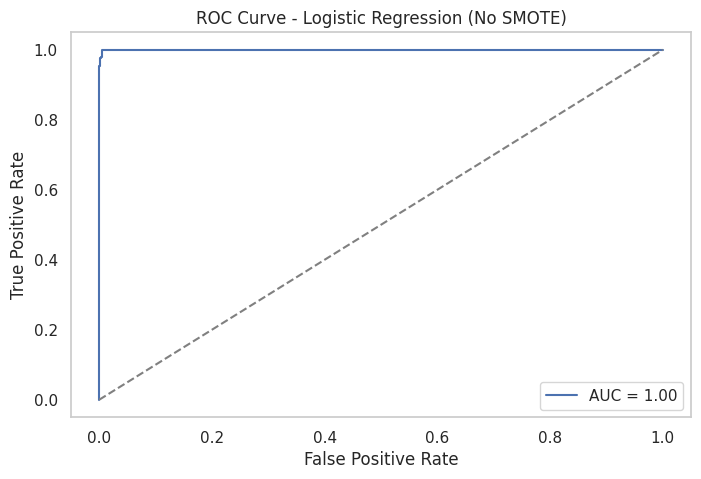

In [ ]:
# initialize & train
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# predict
y_pred = logreg.predict(X_test)
y_proba = logreg.predict_proba(X_test)[:, 1]

# evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

# roc curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve - Logistic Regression (No SMOTE)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

 - The ROC curve shows the trade-off between true positive rate and false positive rate. A curve closer to the top-left corner indicates stronger model performance.


 - This model achieves extremely high precision and recall for both churners and non-churners, meaning it’s correctly identifying nearly all at-risk customers with minimal false positives.  
Such performance is only possible when strong predictors like `engagement_score` are included.

 - The confusion matrix shows almost no false positives or false negatives, which means the model is correctly identifying both churners and non-churners with very high precision. This level of performance is possible because of the inclusion of `engagement_score`, which provides a very strong predictive signal.



In [ ]:
# append model_results list with results
report = classification_report(y_test, y_pred, output_dict=True)

model_results.append({
    "Model": "Logistic Regression",
    "Accuracy": report["accuracy"],
    "Recall (Churn)": report["1"]["recall"],
    "Precision (Churn)": report["1"]["precision"],
    "ROC-AUC": roc_auc_score(y_test, y_proba),
    "Notes": "Used engagement_score"
})

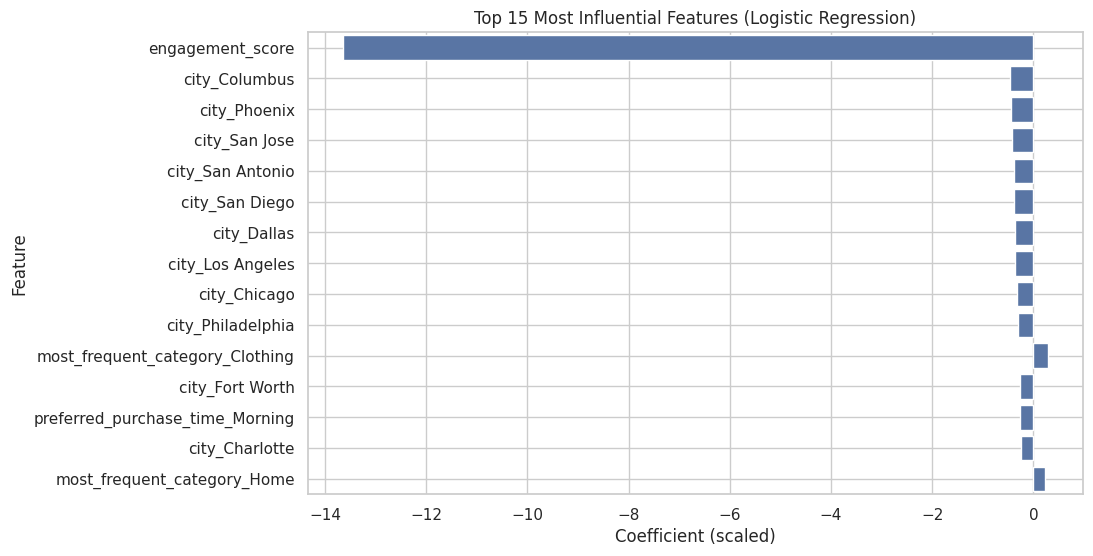

In [ ]:
# get feature names and coefficients
coefficients = pd.Series(logreg.coef_[0], index=X.columns)
coefficients = coefficients.sort_values(key=abs, ascending=False)

# plot
plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients.values[:15], y=coefficients.index[:15])
plt.title('Top 15 Most Influential Features (Logistic Regression)')
plt.xlabel('Coefficient (scaled)')
plt.ylabel('Feature')
plt.grid(True)
plt.show()

These plots show which features most influenced Logistic Regression predictions. `engagement_score` is by far the most influential factor in this model.


---

### **Random Forest Classifier**

Train and evaluate a random forest model.  
Append performance metrics to the summary list and plot feature importances based on tree splits.


In [ ]:
# initialize and fit
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# predict
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1759
           1       1.00      1.00      1.00       241

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix:
 [[1759    0]
 [   0  241]]
ROC-AUC Score: 1.0


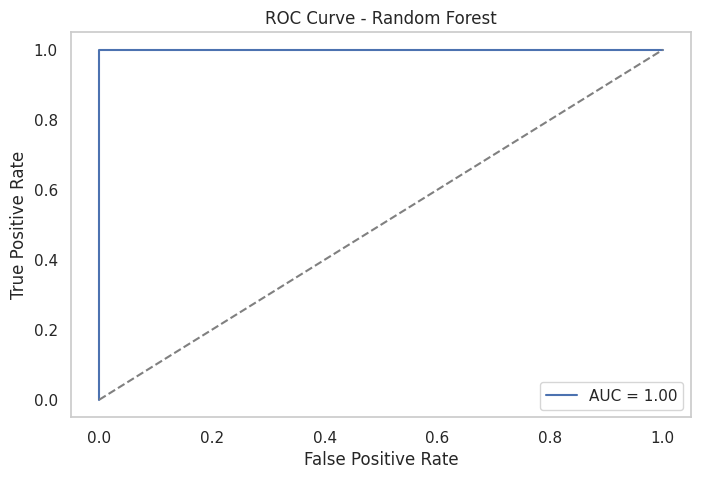

In [ ]:
# evaluation
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_rf))

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba_rf)
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba_rf):.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

 - The ROC curve shows the trade-off between true positive rate and false positive rate. A curve closer to the top-left corner indicates stronger model performance.


 - This model achieves extremely high precision and recall for both churners and non-churners, meaning it’s correctly identifying nearly all at-risk customers with minimal false positives.
Such performance is only possible when strong predictors like engagement_score are included.

 - The confusion matrix shows almost no false positives or false negatives, which means the model is correctly identifying both churners and non-churners with very high precision. This level of performance is possible because of the inclusion of engagement_score, which provides a very strong predictive signal.

In [ ]:
# appending results to model_results list
rf_report = classification_report(y_test, y_pred_rf, output_dict=True)

model_results.append({
    "Model": "Random Forest",
    "Accuracy": rf_report["accuracy"],
    "Recall (Churn)": rf_report["1"]["recall"],
    "Precision (Churn)": rf_report["1"]["precision"],
    "ROC-AUC": roc_auc_score(y_test, y_proba_rf),
    "Notes": "Used engagement_score"
})

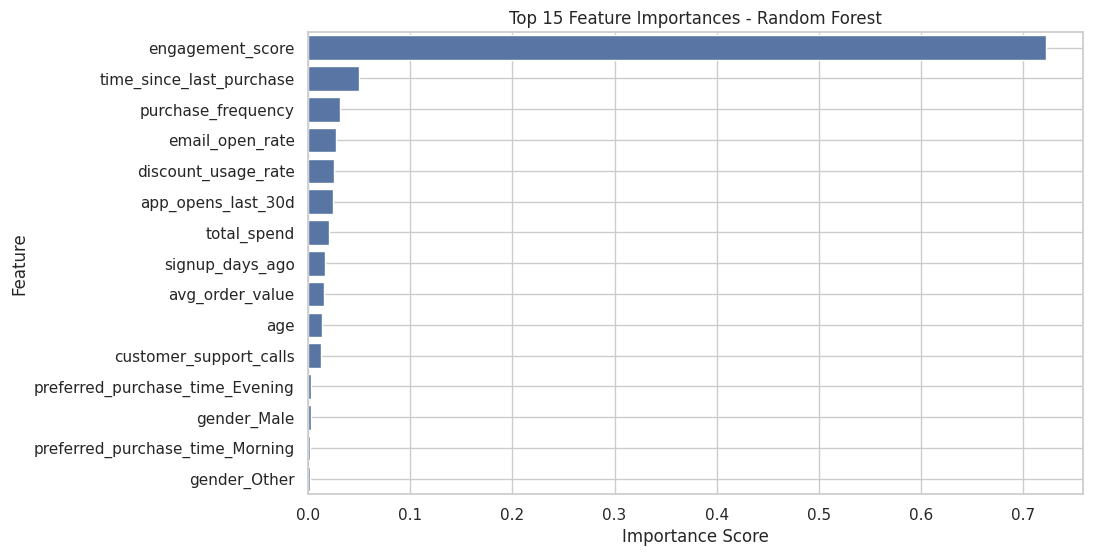

In [ ]:
# feature importances
feat_imp = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_imp = feat_imp.sort_values(ascending=False)[:15]

# plot
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title('Top 15 Feature Importances - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.grid(True)
plt.show()


These plots show which features had the most influence on Random Forest predictions. `engagement_score`, `time_since_last_purchase`, and `purchase_frequency` rank the highest in this model.


---

### **XGBoost Classifier**

Train a gradient boosting model using XGBoost and evaluate its performance.  
Append results and extract feature importances based on model gain.


In [ ]:
# initialize
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# predict
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1759
           1       1.00      1.00      1.00       241

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix:
 [[1758    1]
 [   1  240]]
ROC-AUC Score: 0.999988205293936


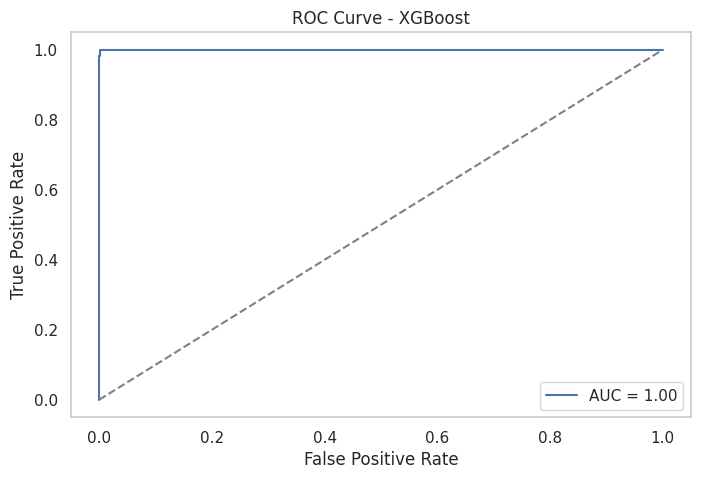

In [ ]:
# evaluation
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_xgb))

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba_xgb)
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba_xgb):.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve - XGBoost")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()


 - The ROC curve shows the trade-off between true positive rate and false positive rate. A curve closer to the top-left corner indicates stronger model performance.


 - This model achieves extremely high precision and recall for both churners and non-churners, meaning it’s correctly identifying nearly all at-risk customers with minimal false positives.
Such performance is only possible when strong predictors like engagement_score are included.

 - The confusion matrix shows almost no false positives or false negatives, which means the model is correctly identifying both churners and non-churners with very high precision. This level of performance is possible because of the inclusion of engagement_score, which provides a very strong predictive signal.

In [ ]:
# appending results to model_results list
xgb_report = classification_report(y_test, y_pred_xgb, output_dict=True)

model_results.append({
    "Model": "XGBoost",
    "Accuracy": xgb_report["accuracy"],
    "Recall (Churn)": xgb_report["1"]["recall"],
    "Precision (Churn)": xgb_report["1"]["precision"],
    "ROC-AUC": roc_auc_score(y_test, y_proba_xgb),
    "Notes": "Used engagement_score"
})

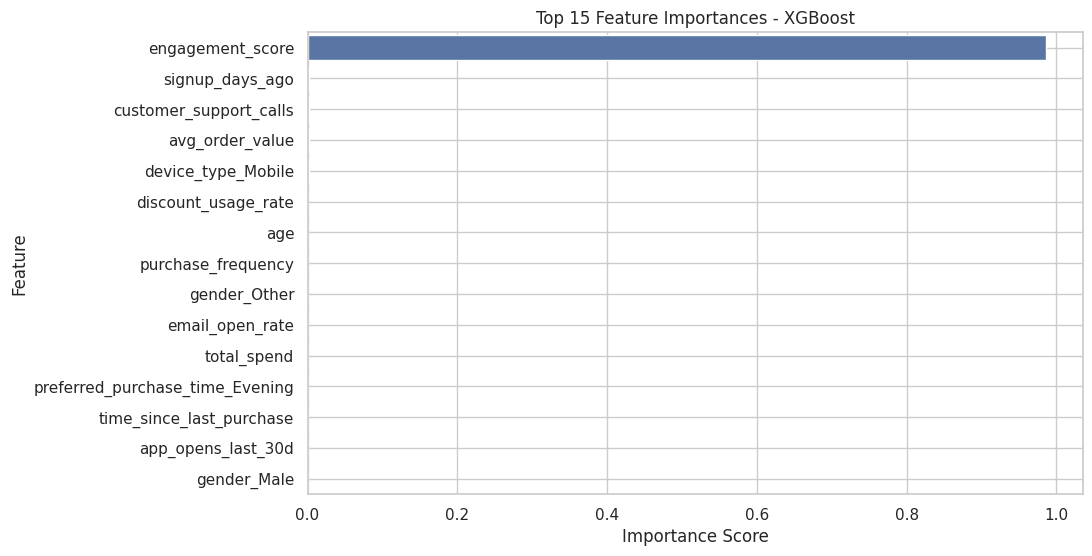

In [ ]:
# feature importances
xgb_feat_imp = pd.Series(xgb_model.feature_importances_, index=X.columns)
xgb_feat_imp = xgb_feat_imp.sort_values(ascending=False)[:15]

# plot
plt.figure(figsize=(10, 6))
sns.barplot(x=xgb_feat_imp.values, y=xgb_feat_imp.index)
plt.title('Top 15 Feature Importances - XGBoost')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.grid(True)
plt.show()


These plots show which features had the most influence on XGBooster predictions. `engagement_score` is essentially the deciding churning factor.


---

### **XGBoost Without `engagement_score`**

Drop the `engagement_score` to simulate a real-world churn prediction scenario.  
Train and evaluate the model to see how performance changes without this key feature.


In [ ]:
# remove 'engagement_score' from the feature set to simulate a real-world scenario
# where churn must be predicted without direct knowledge of overall engagement
X_no_engage = X.drop('engagement_score', axis=1)

In [ ]:
# split the feature set (without engagement_score) into training and test sets
# stratify ensures the churn ratio remains consistent across both sets
X_train_ne, X_test_ne, y_train_ne, y_test_ne = train_test_split(
    X_no_engage, y, test_size=0.2, stratify=y, random_state=42
)

In [ ]:
# initialize XGBoost classifier without engagement_score as a feature
xgb_model_ne = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# train the model
xgb_model_ne.fit(X_train_ne, y_train_ne)

# make predictions
y_pred_ne = xgb_model_ne.predict(X_test_ne)                 # predicted labels
y_proba_ne = xgb_model_ne.predict_proba(X_test_ne)[:, 1]    # predicted probabilities for ROC-AUC

# evaluate model performance
print("Classification Report:\n", classification_report(y_test_ne, y_pred_ne))
print("Confusion Matrix:\n", confusion_matrix(y_test_ne, y_pred_ne))
print("ROC-AUC Score:", roc_auc_score(y_test_ne, y_proba_ne))


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      1759
           1       0.61      0.33      0.43       241

    accuracy                           0.89      2000
   macro avg       0.76      0.65      0.69      2000
weighted avg       0.88      0.89      0.88      2000

Confusion Matrix:
 [[1707   52]
 [ 161   80]]
ROC-AUC Score: 0.8428850794609347


 - Without `engagement_score`, the model’s recall for churners drops significantly — it misses many actual churners.  
However, precision remains decent, meaning most flagged churners truly are at risk.  
This reflects a real-world scenario where predicting churn is harder without hindsight data.

 - The matrix shows a large number of false negatives — churners who were predicted to stay.  
This means the model struggles to identify at-risk customers and is too conservative in labeling churn.  
This usually happens when important signals like `engagement_score` are removed.



In [ ]:
# appending xgbooster model with no engagement_score to model_results list
xgb_ne_report = classification_report(y_test_ne, y_pred_ne, output_dict=True)

model_results.append({
    "Model": "XGBoost (No Engagement)",
    "Accuracy": xgb_ne_report["accuracy"],
    "Recall (Churn)": xgb_ne_report["1"]["recall"],
    "Precision (Churn)": xgb_ne_report["1"]["precision"],
    "ROC-AUC": roc_auc_score(y_test_ne, y_proba_ne),
    "Notes": "Realistic scenario without engagement_score"
})



---



### **Hyperparameter Tuning with GridSearchCV**

Use grid search to tune the XGBoost model’s learning rate, depth, and number of trees.  
Store and evaluate the best-performing model from the grid search.


In [ ]:
# define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

# initialize model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# grid search
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=3,
    scoring='roc_auc',
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train_ne, y_train_ne)


Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='roc_auc', verbose=1)

In [ ]:
# display the best hyperparameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


In [ ]:
# extract the best model from the grid search
best_model = grid_search.best_estimator_

# make predictions using the tuned model
y_pred_tuned = best_model.predict(X_test_ne)                  # predicted labels
y_proba_tuned = best_model.predict_proba(X_test_ne)[:, 1]     # predicted probabilities

# evaluate performance of the tuned model
print("Classification Report:\n", classification_report(y_test_ne, y_pred_tuned))
print("Confusion Matrix:\n", confusion_matrix(y_test_ne, y_pred_tuned))
print("ROC-AUC Score:", roc_auc_score(y_test_ne, y_proba_tuned))


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      1759
           1       0.68      0.27      0.39       241

    accuracy                           0.90      2000
   macro avg       0.80      0.63      0.67      2000
weighted avg       0.88      0.90      0.88      2000

Confusion Matrix:
 [[1729   30]
 [ 176   65]]
ROC-AUC Score: 0.8662739815861049


 - After applying GridSearchCV, the XGBoost model shows slightly improved performance.  
Precision and accuracy remain strong, but recall on churners is still low — meaning the model continues to miss many actual churners.

 - This is expected in imbalanced classification problems where the minority class (churn) is harder to detect.  
Hyperparameter tuning helps optimize general model performance, but doesn’t inherently solve class imbalance unless paired with techniques like `scale_pos_weight`.


 - The confusion matrix shows the model is very good at identifying retained customers (true negatives),  
but it still misclassifies many churners as retained (false negatives).

 - This suggests the tuned model is reliable overall but still cautious — it only flags customers as churners when it’s very confident.  
That leads to fewer false positives, but more missed churners, which may not align with aggressive retention goals.



In [ ]:
# appending tuned xgbooster model to model_results list
tuned_report = classification_report(y_test_ne, y_pred_tuned, output_dict=True)

model_results.append({
    "Model": "XGBoost Tuned",
    "Accuracy": tuned_report["accuracy"],
    "Recall (Churn)": tuned_report["1"]["recall"],
    "Precision (Churn)": tuned_report["1"]["precision"],
    "ROC-AUC": roc_auc_score(y_test_ne, y_proba_tuned),
    "Notes": "Tuned with GridSearchCV"
})

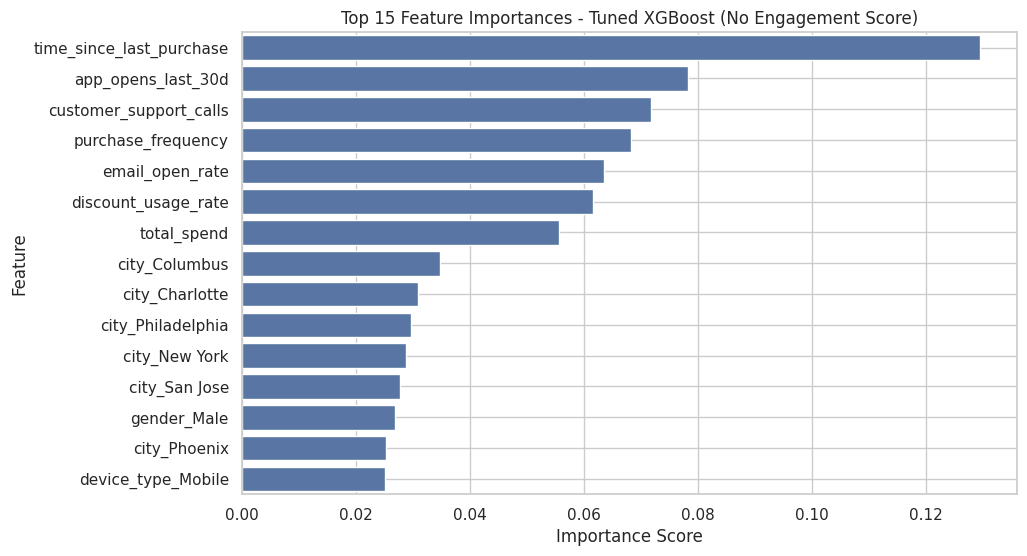

In [ ]:
# get feature importances
feat_imp_tuned = pd.Series(best_model.feature_importances_, index=X_train_ne.columns)
feat_imp_tuned = feat_imp_tuned.sort_values(ascending=False)[:15]

# plot
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp_tuned.values, y=feat_imp_tuned.index)
plt.title('Top 15 Feature Importances - Tuned XGBoost (No Engagement Score)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.grid(True)
plt.show()


These plots show which features had the most influence on the tuned XGBoost model. `time_since_last_purchase`, `app_opens_last_30d`, `customer_support_calls`, `purchase_frequency`, and `email_open_rate` are the most influential churning signals.



---



### **XGBoost with Class Weights**

Apply `scale_pos_weight` to help the model focus on the minority churn class.  
Evaluate the trade-off: improved recall vs reduced precision. This setting is useful when recall is more important than false positives.


In [ ]:
# calculate class imbalance ratio (non-churners : churners)
scale_weight = y_train_ne.value_counts()[0] / y_train_ne.value_counts()[1]

# initialize XGBoost model with class weighting to handle imbalance
xgb_weighted = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    scale_pos_weight=scale_weight,       # focus more on minority class (churners)
    **grid_search.best_params_           # use best parameters from previous tuning
)

# train the weighted model
xgb_weighted.fit(X_train_ne, y_train_ne)

# predict and evaluate
y_pred_weighted = xgb_weighted.predict(X_test_ne)                  # predicted labels
y_proba_weighted = xgb_weighted.predict_proba(X_test_ne)[:, 1]     # predicted probabilities

# performance metrics
print("Classification Report:\n", classification_report(y_test_ne, y_pred_weighted))
print("Confusion Matrix:\n", confusion_matrix(y_test_ne, y_pred_weighted))
print("ROC-AUC Score:", roc_auc_score(y_test_ne, y_proba_weighted))


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.79      0.87      1759
           1       0.34      0.78      0.47       241

    accuracy                           0.79      2000
   macro avg       0.65      0.78      0.67      2000
weighted avg       0.89      0.79      0.82      2000

Confusion Matrix:
 [[1394  365]
 [  54  187]]
ROC-AUC Score: 0.8641721649654769


 - Here, recall improves dramatically — the model is catching far more churners.  
Precision drops, meaning more false positives, but this is often acceptable in a business context where **missing a churner is costlier than over-alerting**.

 - Here, false negatives decrease — the model is catching more churners.  
However, false positives increase, meaning more customers are wrongly flagged as churners.  
This is a deliberate trade-off: we prioritize **catching churners early**, even if some loyal customers are mistakenly flagged.


In [ ]:
# appending last model to model_results list
weighted_report = classification_report(y_test_ne, y_pred_weighted, output_dict=True)

model_results.append({
    "Model": "XGBoost w/ Class Weights",
    "Accuracy": weighted_report["accuracy"],
    "Recall (Churn)": weighted_report["1"]["recall"],
    "Precision (Churn)": weighted_report["1"]["precision"],
    "ROC-AUC": roc_auc_score(y_test_ne, y_proba_weighted),
    "Notes": "Used scale_pos_weight for recall boost"
})



---



### **Model Performance Summary**

Compile all stored model results into a final summary table and visualize the performance of each model using ROC-AUC and recall scores.


In [ ]:
# model results summary table
summary_df = pd.DataFrame(model_results)
summary_df = summary_df.sort_values(by="ROC-AUC", ascending=False).reset_index(drop=True)
summary_df

,Model,Accuracy,Recall (Churn),Precision (Churn),ROC-AUC,Notes
0,Random Forest,1.0000,1.000000,1.000000,1.000000,Used engagement_score
1,XGBoost,0.9990,0.995851,0.995851,0.999988,Used engagement_score
2,Logistic Regression,0.9940,0.954357,0.995671,0.999861,Used engagement_score
3,XGBoost Tuned,0.8970,0.269710,0.684211,0.866274,Tuned with GridSearchCV
4,XGBoost w/ Class Weights,0.7905,0.775934,0.338768,0.864172,Used scale_pos_weight for recall boost
5,XGBoost (No Engagement),0.8935,0.331950,0.606061,0.842885,Realistic scenario without engagement_score


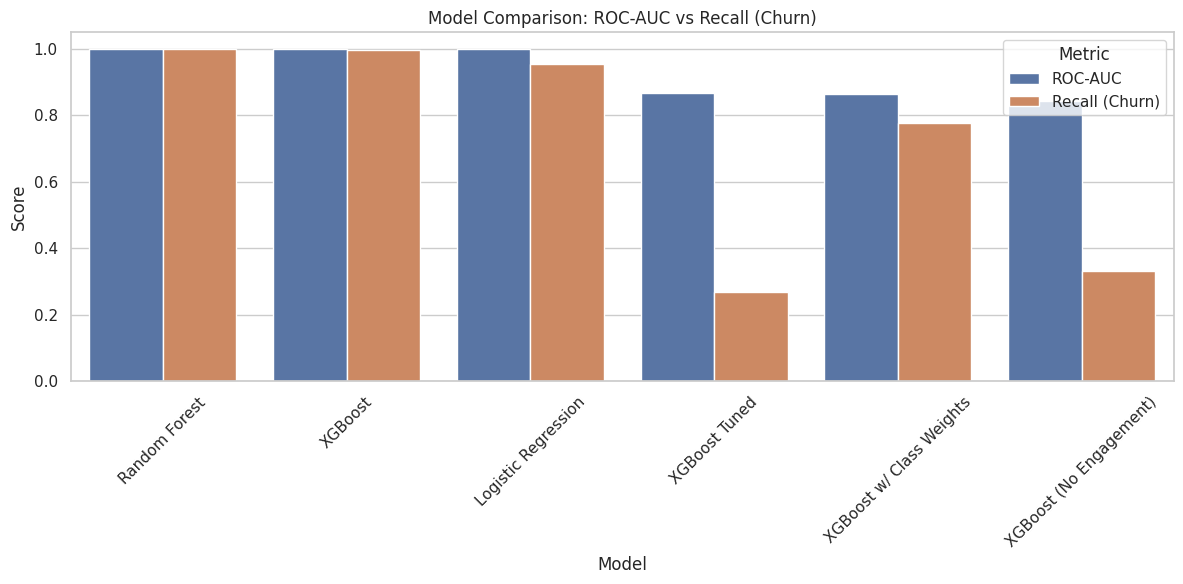

In [ ]:
# set style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# melt the DataFrame for dual-metric plotting
plot_df = summary_df[["Model", "ROC-AUC", "Recall (Churn)"]].melt(id_vars="Model", var_name="Metric", value_name="Score")

# create grouped bar chart
sns.barplot(data=plot_df, x="Model", y="Score", hue="Metric")

plt.title("Model Comparison: ROC-AUC vs Recall (Churn)")
plt.xticks(rotation=45)
plt.ylim(0, 1.05)
plt.legend(title="Metric")
plt.tight_layout()
plt.show()

 - This chart compares ROC-AUC and recall across models.  
Models using `engagement_score` perform significantly better, but recall can be recovered using class weighting, even without it.




---



# **Conclusion**

This project demonstrated how customer churn can be predicted using behavioral and profile data.  
Models that include `engagement_score` achieve near-perfect performance, but even without it, we can identify at-risk customers using features like app usage, purchase history, and support interactions.

By tuning and applying class weighting, we recovered churn recall from 33% to 78% — a big gain in business value.  
These insights can support targeted retention strategies, such as re-engagement campaigns, early warnings, and personalized offers.
